In [1]:
from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd
from itertools import product
sns.set_context('talk')
import generate_power_spectrum as gps

In [2]:
h_range = np.linspace(0.4,0.8,2)
omc_range = np.linspace(0.2, 0.3, 2)

pairs = list(product(h_range, omc_range))

In [4]:
dict_list = []


for i, (h, omc) in enumerate(pairs):
    
    k, pk_lin = gps.get_power_spectrum(h, omc, mode = 'linear')
    
    k, pk_nonlin = gps.get_power_spectrum(h, omc)
    
    result_dict = {'h': h, 'omc':omc, 'k': k, 'pk': pk_nonlin/pk_lin}
    
    dict_list.append(result_dict)
    

In [5]:
df = pd.DataFrame(dict_list)

In [15]:
df

,h,omc,k,pk
0,0.4,0.2,"[0.0001, 0.00010473708979594497, 0.00010969857...","[1.000000995259361, 1.0000011627533008, 1.0000..."
1,0.4,0.3,"[0.0001, 0.00010473708979594497, 0.00010969857...","[1.0000032853931704, 1.0000034738926735, 1.000..."
2,0.8,0.2,"[0.0001, 0.00010473708979594497, 0.00010969857...","[1.0000017101468885, 1.0000017221784367, 1.000..."
3,0.8,0.3,"[0.0001, 0.00010473708979594497, 0.00010969857...","[0.9999996413964783, 0.9999996541426692, 0.999..."


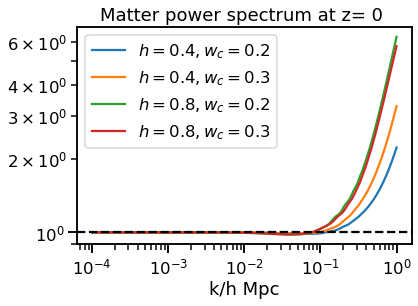

In [18]:

for i in range(len(df)):
    plt.loglog(df['k'][i], df['pk'][i][:],
              label = f'$h = {df.h[i]}, w_c = {df.omc[i]}$')
plt.axhline(y = 1, linestyle='dashed', color = 'black')
plt.title('Matter power spectrum at z= 0 ');
plt.xlabel('k/h Mpc');


plt.legend()